<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,76.222155,73.436527,16.557543,176.216225,155.032096,21.184129
1,0.0,1.0,67.734219,76.748889,31.532668,186.015776,150.260020,35.755756
2,0.0,2.0,82.268849,86.713783,-7.124991,171.857642,177.039053,-5.181411
3,0.0,3.0,69.412666,95.760113,7.497194,182.669973,174.605773,8.064200
4,0.0,4.0,72.841460,73.048491,-16.383242,139.506709,151.099745,-11.593036
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.868775,90.482334,24.211458,211.562568,204.790829,6.771739
29996,999.0,26.0,83.715211,87.945441,17.497043,199.157695,197.801582,1.356112
29997,999.0,27.0,91.579421,49.741849,-4.885246,146.436025,164.295750,-17.859725
29998,999.0,28.0,73.057498,79.113660,12.644076,174.815234,173.885598,0.929636


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    76.222155  73.436527  16.557543  176.216225  155.032096   
      1.0    67.734219  76.748889  31.532668  186.015776  150.260020   
      2.0    82.268849  86.713783  -7.124991  171.857642  177.039053   
      3.0    69.412666  95.760113   7.497194  182.669973  174.605773   
      4.0    72.841460  73.048491 -16.383242  139.506709  151.099745   
...                ...        ...        ...         ...         ...   
999.0 25.0   86.868775  90.482334  24.211458  211.562568  204.790829   
      26.0   83.715211  87.945441  17.497043  199.157695  197.801582   
      27.0   91.579421  49.741849  -4.885246  146.436025  164.295750   
      28.0   73.057498  79.113660  12.644076  174.815234  173.885598   
      29.0   32.071097  98.377531 -69.190702   71.257926  142.796594   

                 e_hat  
rep   index             
0.0   0.0    21.184129  
      1.0    35.755756  
      2.0    -5.181411  
      3.0     8.064200  
      4.0   -11.593036  
...                ...  
999.0 25.0    6.771739  
      26.0    1.356112  
      27.0  -17.859725  
      28.0    0.929636  
      29.0  -71.538668  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    76.222155  73.436527  16.557543  176.216225  155.032096   
      1.0    67.734219  76.748889  31.532668  186.015776  150.260020   
      2.0    82.268849  86.713783  -7.124991  171.857642  177.039053   
      3.0    69.412666  95.760113   7.497194  182.669973  174.605773   
      4.0    72.841460  73.048491 -16.383242  139.506709  151.099745   
...                ...        ...        ...         ...         ...   
999.0 25.0   86.868775  90.482334  24.211458  211.562568  204.790829   
      26.0   83.715211  87.945441  17.497043  199.157695  197.801582   
      27.0   91.579421  49.741849  -4.885246  146.436025  164.295750   
      28.0   73.057498  79.113660  12.644076  174.815234  173.885598   
      29.0   32.071097  98.377531 -69.190702   71.257926  142.796594   

                 e_hat  
rep   index             
0.0   0.0    21.184129  
      1.0    35.755756  
      2.0    -5.181411  
      3.0     8.064200  
      4.0   -11.593036  
...                ...  
999.0 25.0    6.771739  
      26.0    1.356112  
      27.0  -17.859725  
      28.0    0.929636  
      29.0  -71.538668  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,76.222155,73.436527,16.557543,176.216225,155.032096,21.184129
1,0.0,1.0,67.734219,76.748889,31.532668,186.015776,150.260020,35.755756
2,0.0,2.0,82.268849,86.713783,-7.124991,171.857642,177.039053,-5.181411
3,0.0,3.0,69.412666,95.760113,7.497194,182.669973,174.605773,8.064200
4,0.0,4.0,72.841460,73.048491,-16.383242,139.506709,151.099745,-11.593036
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.868775,90.482334,24.211458,211.562568,204.790829,6.771739
29996,999.0,26.0,83.715211,87.945441,17.497043,199.157695,197.801582,1.356112
29997,999.0,27.0,91.579421,49.741849,-4.885246,146.436025,164.295750,-17.859725
29998,999.0,28.0,73.057498,79.113660,12.644076,174.815234,173.885598,0.929636


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    76.222155  73.436527  16.557543  176.216225  155.032096   
      1.0    67.734219  76.748889  31.532668  186.015776  150.260020   
      2.0    82.268849  86.713783  -7.124991  171.857642  177.039053   
      3.0    69.412666  95.760113   7.497194  182.669973  174.605773   
      4.0    72.841460  73.048491 -16.383242  139.506709  151.099745   
...                ...        ...        ...         ...         ...   
999.0 25.0   86.868775  90.482334  24.211458  211.562568  204.790829   
      26.0   83.715211  87.945441  17.497043  199.157695  197.801582   
      27.0   91.579421  49.741849  -4.885246  146.436025  164.295750   
      28.0   73.057498  79.113660  12.644076  174.815234  173.885598   
      29.0   32.071097  98.377531 -69.190702   71.257926  142.796594   

                 e_hat  
rep   index             
0.0   0.0    21.184129  
      1.0    35.755756  
      2.0    -5.181411  
      3.0     8.064200  
      4.0   -11.593036  
...                ...  
999.0 25.0    6.771739  
      26.0    1.356112  
      27.0  -17.859725  
      28.0    0.929636  
      29.0  -71.538668  

[30000 rows x 6 columns]

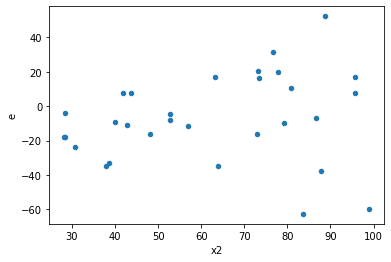

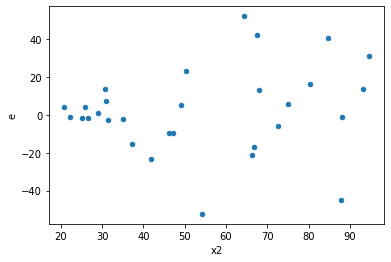

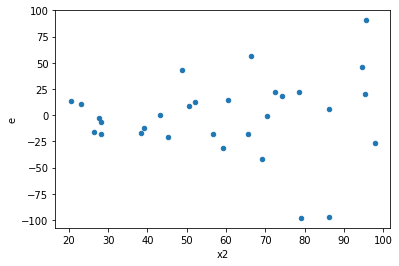

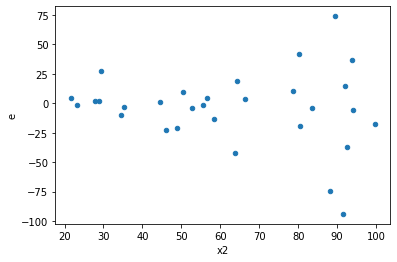

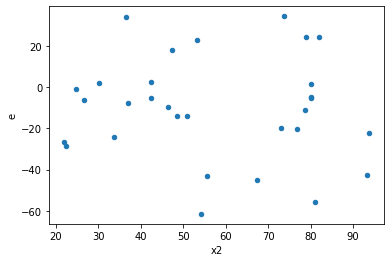

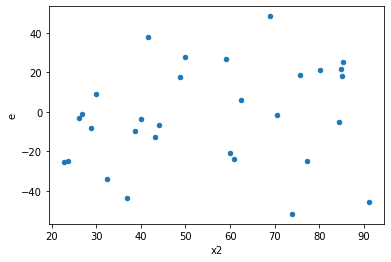

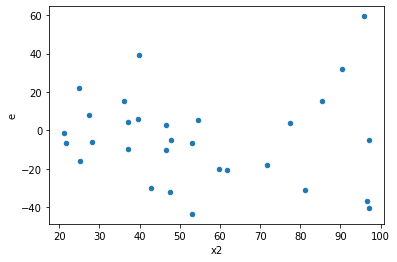

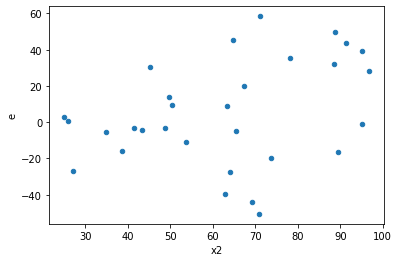

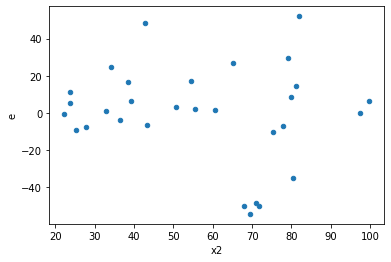

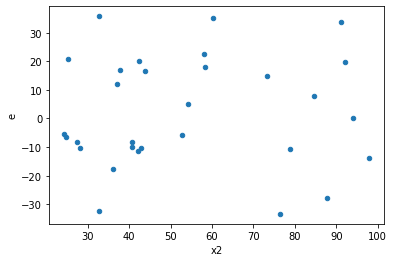

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,15.0,1694.997400760778,9955.995782443828,154.09067279643435,663.7330521629218,4.307418743247129,0.010247835093070812,0.9948760824534646,0.005123917546535406,Reject001=1 : Homoscedasticity
2.0,8.0,18.0,1868.695438552198,38103.73623465217,233.58692981902476,2116.874235258454,9.062468678784967,0.00011877653915060016,0.9999406117304247,5.938826957530008e-05,Reject001=0 : Heteroscedasticity
3.0,17.0,9.0,5585.04524543159,19553.067955469174,328.5320732606818,2172.5631061632416,6.612940662385095,0.006727687187757514,0.9966361564061212,0.003363843593878757,Reject001=0 : Heteroscedasticity
4.0,12.0,14.0,7119.597202038424,10064.55951168209,593.2997668365354,718.8971079772921,1.2116928880832698,0.7236808246927047,0.6381595876536477,0.36184041234635234,Reject001=1 : Homoscedasticity
5.0,12.0,14.0,5546.3664268485545,8870.445831756653,462.19720223737954,633.6032736969038,1.3708505171164838,0.5675455894496197,0.7162272052751901,0.2837727947248099,Reject001=1 : Homoscedasticity
8.0,10.0,16.0,4481.772302289479,10616.500923168298,448.1772302289479,663.5313076980186,1.4805109741051743,0.4670108886721964,0.7664945556639018,0.2335054443360982,Reject001=1 : Homoscedasticity
10.0,14.0,12.0,6053.037744115291,5569.329473284308,432.359838865378,464.110789440359,1.0734364011659907,0.9120871192519473,0.5439564403740264,0.45604355962597365,Reject001=1 : Homoscedasticity
11.0,13.0,13.0,5532.024188549817,16028.821349326574,425.54032219613975,1232.9862576405058,2.8974604598625993,0.06570254074361825,0.9671487296281909,0.03285127037180913,Reject001=1 : Homoscedasticity
13.0,8.0,18.0,1951.2573838562803,22385.58089026903,243.90717298203504,1243.643382792724,5.098838904931773,0.003972654444611257,0.9980136727776944,0.0019863272223056283,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,8.0,15641.262675090062,2429.199171388916,868.9590375050034,303.6498964236145,0.34944097859373047,0.06089683611380017,Reject001=1 : Homoscedasticity
1.0,11.0,15.0,1694.997400760778,9955.995782443828,154.09067279643435,663.7330521629218,4.307418743247129,0.010247835093070812,Reject001=1 : Homoscedasticity
2.0,8.0,18.0,1868.695438552198,38103.73623465217,233.58692981902476,2116.874235258454,9.062468678784967,0.00011877653915060016,Reject001=0 : Heteroscedasticity
3.0,17.0,9.0,5585.04524543159,19553.067955469174,328.5320732606818,2172.5631061632416,6.612940662385095,0.006727687187757514,Reject001=0 : Heteroscedasticity
4.0,12.0,14.0,7119.597202038424,10064.55951168209,593.2997668365354,718.8971079772921,1.2116928880832698,0.7236808246927047,Reject001=1 : Homoscedasticity
5.0,12.0,14.0,5546.3664268485545,8870.445831756653,462.19720223737954,633.6032736969038,1.3708505171164838,0.5675455894496197,Reject001=1 : Homoscedasticity
6.0,15.0,11.0,12215.549574168392,2313.52523869827,814.3699716112261,210.3204762452973,0.258261580825702,0.016880459759056842,Reject001=1 : Homoscedasticity
7.0,15.0,11.0,13284.953004747305,4411.257596265623,885.6635336498204,401.02341784232937,0.4527943204229166,0.15453196883380627,Reject001=1 : Homoscedasticity
8.0,10.0,16.0,4481.772302289479,10616.500923168298,448.1772302289479,663.5313076980186,1.4805109741051743,0.4670108886721964,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      883
Reject001=0 : Heteroscedasticity    117
Name: Result_test, dtype: int64